# Exemplos de análise e visualização de redes complexas

In [25]:
import numpy as np
import collections
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 26})  # increase the font size

# Vizualizando uma rede pequena

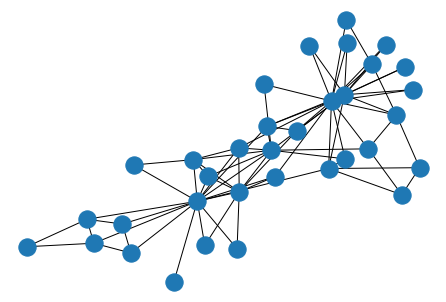

In [26]:
G = nx.karate_club_graph();

pos = nx.spring_layout(G);
pos = nx.draw(G, pos);

# Calculando e exibindo o grau

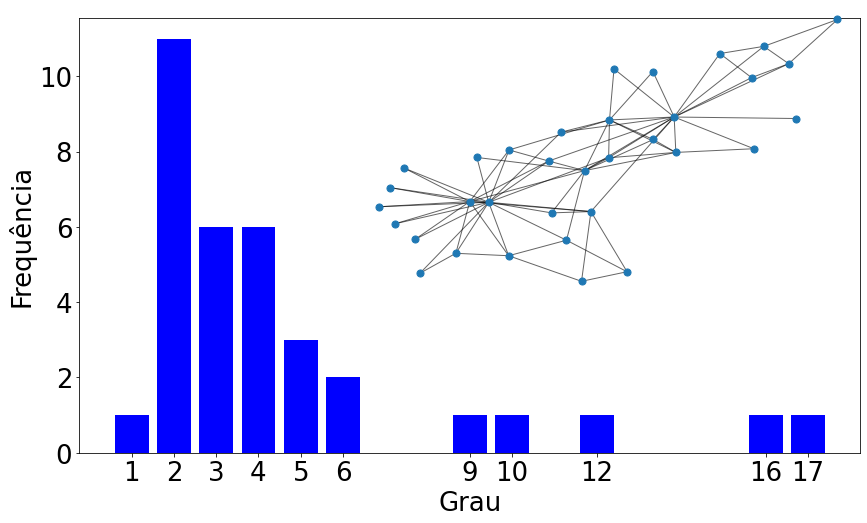

In [27]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(14, 8));

plt.bar(deg, cnt, width=0.80, color="b")

#plt.title("Histograma do grau")
plt.ylabel("Frequência")
plt.xlabel("Grau")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(G)
plt.axis("off")
nx.draw_networkx_nodes(G, pos, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.6)
plt.show()

Em redes grandes a distribuição de grau e seus momentos são ferramentas importantes para a caracterização de redes.

Aqui, neste exemplo, o objetivo é apenas demonstrar sua aplicação.

# Vizualizando o grau

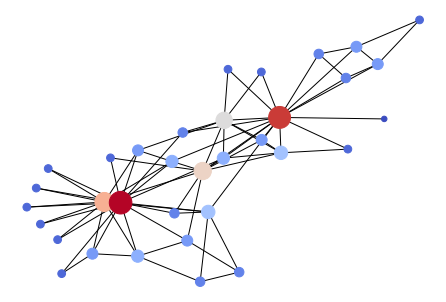

In [28]:
k = dict(G.degree);

node_size=np.array([v for v in k.values()])
scale = 30/np.min(node_size);

nx.draw(G, pos, nodelist=k.keys(), node_size=scale*node_size, node_color=scale*node_size, cmap=plt.cm.coolwarm);

# Vizualizando o k-core

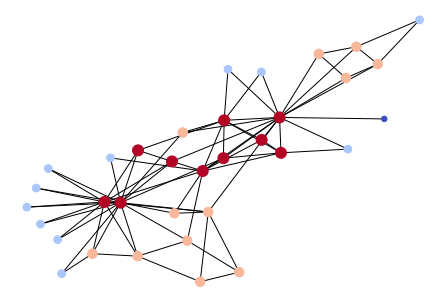

In [29]:
kc = nx.core_number(G);

node_size=np.array([v for v in kc.values()])
scale = 30/np.min(node_size);

nx.draw(G, pos, nodelist=kc.keys(), node_size=scale*node_size, node_color=scale*node_size, cmap=plt.cm.coolwarm);

# Vizualizando a centralidade de autovetor

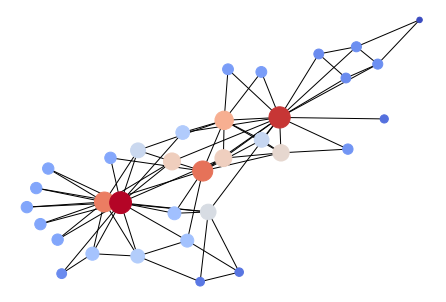

In [30]:
x = nx.eigenvector_centrality(G);

node_size=np.array([v for v in x.values()])
scale = 30/np.min(node_size);

nx.draw(G, pos, nodelist=x.keys(), node_size=scale*node_size, node_color=scale*node_size, cmap=plt.cm.coolwarm);